###Data overview

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Introduction to Data Analytics/Assignment3-Loan-Dataset.csv")
df_unknown = pd.read_csv("/content/drive/MyDrive/Introduction to Data Analytics/Assignment3-Unknown-Dataset.csv")

df.sample(10)

,disbursed_amount,asset_cost,branch_id,Employment.Type,DisbursalDate,State_ID,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,PRI.CURRENT.BALANCE,SEC.NO.OF.ACCTS,PRIMARY.INSTAL.AMT,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,Age,marital status
11233,43794,71100,16,Salaried,2018-09-16,14,0,0,0,0,0,1,0,0,2yrs 3mon,1,0,50,Divorced
4487,54553,73602,34,Self employed,2018-10-27,6,0,0,708,7,119864,0,12386,0,1yrs 1mon,0,0,32,Married
31000,57113,64920,61,Salaried,2018-10-13,6,1,0,637,11,116743,0,13445,0,2yrs 0mon,1,0,55,Married
9642,65827,79935,7,Self employed,2018-09-17,3,0,0,0,0,0,0,0,0,0yrs 0mon,0,0,30,Single
23499,53103,65158,73,Salaried,2018-08-18,11,0,0,710,3,30000,0,5936,0,0yrs 6mon,1,1,34,Divorced
34973,35939,46450,34,Self employed,2018-08-24,6,0,0,0,0,0,0,0,0,0yrs 0mon,0,0,56,Married
28211,41894,69990,5,Salaried,2018-09-26,9,0,0,0,0,0,0,0,0,0yrs 0mon,0,0,55,Married
29775,31984,48500,207,Self employed,2018-10-13,6,0,0,0,0,0,0,0,0,0yrs 0mon,0,0,49,Married
46747,55013,67308,258,Salaried,2018-10-30,16,0,0,0,0,0,0,0,0,0yrs 0mon,0,1,31,Divorced
20875,34156,77848,5,Salaried,2018-10-28,9,0,0,300,6,8,0,5467,0,12yrs 1mon,0,0,48,Married


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48962 entries, 0 to 48961
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   disbursed_amount                     48962 non-null  int64 
 1   asset_cost                           48962 non-null  int64 
 2   branch_id                            48962 non-null  int64 
 3   Employment.Type                      47358 non-null  object
 4   DisbursalDate                        48962 non-null  object
 5   State_ID                             48962 non-null  int64 
 6   Driving_flag                         48962 non-null  int64 
 7   Passport_flag                        48962 non-null  int64 
 8   PERFORM_CNS.SCORE                    48962 non-null  int64 
 9   PRI.NO.OF.ACCTS                      48962 non-null  int64 
 10  PRI.CURRENT.BALANCE                  48962 non-null  int64 
 11  SEC.NO.OF.ACCTS                      4896

In [5]:
df.describe()

,disbursed_amount,asset_cost,branch_id,State_ID,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,PRI.CURRENT.BALANCE,SEC.NO.OF.ACCTS,PRIMARY.INSTAL.AMT,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default
count,48962.000000,4.896200e+04,48962.000000,48962.000000,48962.000000,48962.000000,48962.000000,48962.000000,4.896200e+04,48962.000000,4.896200e+04,48962.000000,48962.000000,48962.000000
mean,54336.719640,7.589285e+04,73.136494,7.250460,0.023651,0.002308,288.764532,2.419101,1.663824e+05,0.053450,1.377215e+04,0.094910,0.206956,0.218598
std,13364.092014,1.970148e+04,69.958409,4.489352,0.151961,0.047986,338.599975,5.007325,9.428797e+05,0.614549,1.432032e+05,0.369149,0.737136,0.413299
min,13320.000000,3.809800e+04,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-1.408314e+06,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,47049.000000,6.572100e+04,14.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
50%,53803.000000,7.096100e+04,61.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
75%,60370.750000,7.915300e+04,130.000000,10.000000,0.000000,0.000000,678.000000,3.000000,3.439575e+04,0.000000,1.943000e+03,0.000000,0.000000,0.000000
max,990572.000000,1.628992e+06,261.000000,22.000000,1.000000,1.000000,879.000000,104.000000,5.638582e+07,52.000000,1.551855e+07,8.000000,36.000000,1.000000


In [6]:
def credit_history_to_months(credit_history):
  # if credit_history is None:
  #   return None
  parts = credit_history.replace('yrs', '').replace('mon', '').split()
  years = int(parts[0])
  months = int(parts[1])
  return years * 12 + months

df['CREDIT.HISTORY.LENGTH'] = df['CREDIT.HISTORY.LENGTH'].apply(credit_history_to_months)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48962 entries, 0 to 48961
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   disbursed_amount                     48962 non-null  int64 
 1   asset_cost                           48962 non-null  int64 
 2   branch_id                            48962 non-null  int64 
 3   Employment.Type                      47358 non-null  object
 4   DisbursalDate                        48962 non-null  object
 5   State_ID                             48962 non-null  int64 
 6   Driving_flag                         48962 non-null  int64 
 7   Passport_flag                        48962 non-null  int64 
 8   PERFORM_CNS.SCORE                    48962 non-null  int64 
 9   PRI.NO.OF.ACCTS                      48962 non-null  int64 
 10  PRI.CURRENT.BALANCE                  48962 non-null  int64 
 11  SEC.NO.OF.ACCTS                      4896

In [8]:
df.columns

Index(['disbursed_amount', 'asset_cost', 'branch_id', 'Employment.Type',
       'DisbursalDate', 'State_ID', 'Driving_flag', 'Passport_flag',
       'PERFORM_CNS.SCORE', 'PRI.NO.OF.ACCTS', 'PRI.CURRENT.BALANCE',
       'SEC.NO.OF.ACCTS', 'PRIMARY.INSTAL.AMT',
       'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'CREDIT.HISTORY.LENGTH',
       'NO.OF_INQUIRIES', 'loan_default', 'Age', 'marital status'],
      dtype='object')

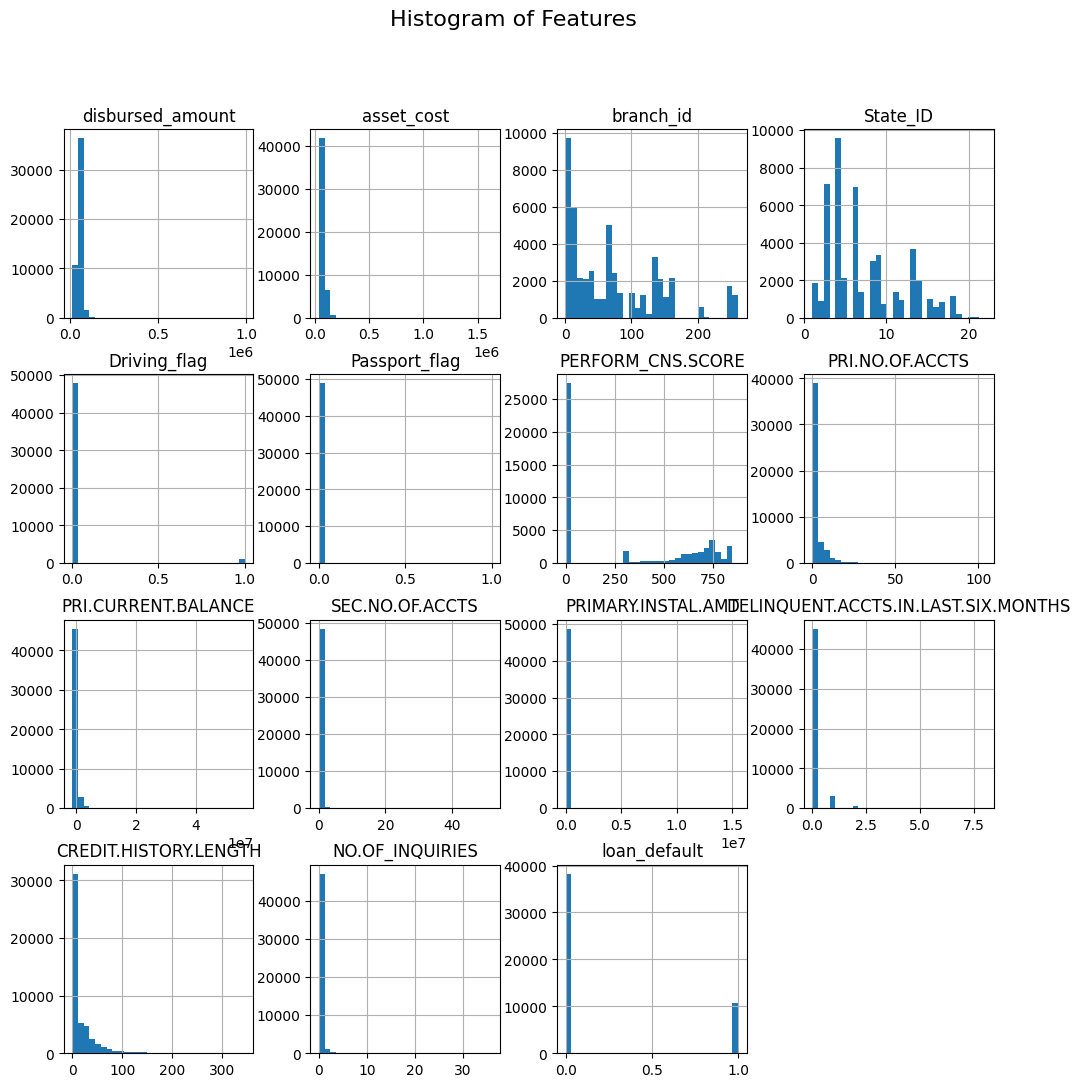

In [9]:
df.hist(figsize=(12,12), bins=30)
plt.suptitle("Histogram of Features", fontsize=16)
plt.show()

In [10]:
def drop_columns_with_nulls(df, threshold=0.5):
    row_count = len(df)
    null_threshold = threshold * row_count
    cols_to_drop = [col for col in df.columns if df[col].isnull().sum() > null_threshold]

    return df.drop(columns=cols_to_drop)

In [11]:
df = drop_columns_with_nulls(df)

In [12]:
#Count of missing values in column "Age"
age_testCount = (df['Age'] == '?').sum()
print(f'Number of records with Age="?": {age_testCount}')

df['Age'] = df['Age'].replace({"?" : None})
df['Age'] = pd.to_numeric(df['Age'])

Number of records with Age="?": 1891


###PCA

In [13]:
from sklearn.decomposition import PCA
import numpy as np
numeric_df = df.select_dtypes(include=['number'])
cleaned_df = numeric_df.dropna(axis=0)

pcs = PCA()
pcs.fit(cleaned_df)

PCA()

In [14]:
PCA()

PCA()

In [15]:
summ = {'Standard deviation': np.sqrt(pcs.explained_variance_), 'Proportion of variance': pcs.explained_variance_ratio_,
'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)}
pcsSummary_df = pd.DataFrame(summ)
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
Standard deviation,944005.3716,138024.6936,22677.6133,7483.1387,333.2602,70.069,23.6279,8.3791,4.4077,3.9667,0.7258,0.6065,0.4107,0.3385,0.1517,0.0483
Proportion of variance,0.9785,0.0209,0.0006,0.0001,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Cumulative proportion,0.9785,0.9994,0.9999,1.0000,1.0000,1.000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [16]:
kaiser_criteria = pcsSummary_df.loc['Standard deviation'] > 1
selected_pcs = pcsSummary_df.loc[:, kaiser_criteria]
selected_pcs

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
Standard deviation,944005.371641,138024.693565,22677.613331,7483.138674,3.332602e+02,7.006895e+01,2.362793e+01,8.379071e+00,4.407712e+00,3.966665e+00
Proportion of variance,0.978456,0.020917,0.000565,0.000061,1.219437e-07,5.390683e-09,6.129764e-10,7.708757e-11,2.133138e-11,1.727601e-11
Cumulative proportion,0.978456,0.999374,0.999938,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [17]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), columns=pcsSummary_df.columns, index=cleaned_df.columns)
pcsComponents_df.loc[:, kaiser_criteria]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
disbursed_amount,1.366108e-04,1.510348e-04,5.188638e-01,8.548522e-01,-0.002816,-8.689859e-05,-0.000056,-3.444288e-05,1.762284e-06,-2.491548e-05
asset_cost,-1.163499e-04,-4.929579e-04,8.548567e-01,-5.188589e-01,0.002286,6.092599e-07,0.000029,6.849483e-05,5.034053e-06,1.426121e-05
branch_id,-3.014805e-07,1.789660e-06,4.634038e-05,6.179567e-05,-0.003460,9.999089e-01,-0.005171,-6.951502e-04,-1.194392e-02,5.846388e-04
State_ID,-2.908353e-08,6.548702e-07,-5.132509e-06,1.330645e-07,-0.000585,1.197066e-02,0.001014,1.771559e-02,9.991826e-01,-3.349060e-02
Driving_flag,9.229508e-10,1.149318e-08,8.551188e-08,-5.851026e-07,0.000005,-3.735939e-05,0.000075,-1.645782e-04,1.405755e-03,-3.403676e-05
Passport_flag,4.711554e-10,-1.709852e-09,2.761277e-08,2.753559e-08,0.000001,-5.178873e-06,0.000013,-8.451403e-05,-3.813463e-05,4.448826e-05
PERFORM_CNS.SCORE,5.283389e-05,1.301843e-04,-4.927076e-04,3.588953e-03,0.999312,3.275442e-03,-0.036565,-9.377142e-04,4.744615e-04,-3.770939e-03
PRI.NO.OF.ACCTS,1.484861e-06,8.510891e-06,-2.957532e-06,5.404498e-05,0.005764,1.251283e-04,0.054741,2.212904e-02,3.303717e-02,9.971021e-01
PRI.CURRENT.BALANCE,9.996652e-01,-2.587358e-02,1.971933e-05,-1.673124e-04,-0.000049,1.607522e-07,-0.000005,-1.713141e-07,8.717444e-10,-6.856193e-07
SEC.NO.OF.ACCTS,1.510879e-08,6.387346e-09,-4.849445e-07,2.363405e-07,0.000089,2.093618e-06,0.003494,-1.693668e-03,5.244609e-03,-6.543398e-04


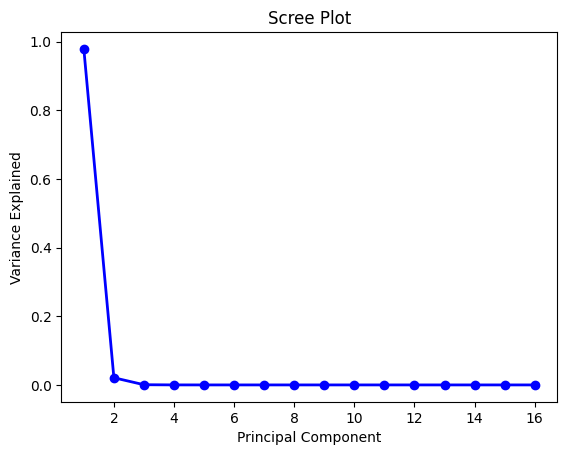

In [18]:
PC_values = np.arange(pcs.n_components_) + 1
plt.plot(PC_values, pcs.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [19]:
filtered_features = pcsComponents_df.loc[:, kaiser_criteria].apply(lambda x: cleaned_df.columns[x > 0.6], axis=0)
feature = []
for idx, values in filtered_features.items():
    feature.extend(values.dropna().tolist())
feature = list(set(feature))
print(len(feature))
feature

10


['PRIMARY.INSTAL.AMT',
 'asset_cost',
 'State_ID',
 'PERFORM_CNS.SCORE',
 'Age',
 'PRI.CURRENT.BALANCE',
 'branch_id',
 'disbursed_amount',
 'PRI.NO.OF.ACCTS',
 'CREDIT.HISTORY.LENGTH']

Correlation Matrix to recheck new variables from PCA

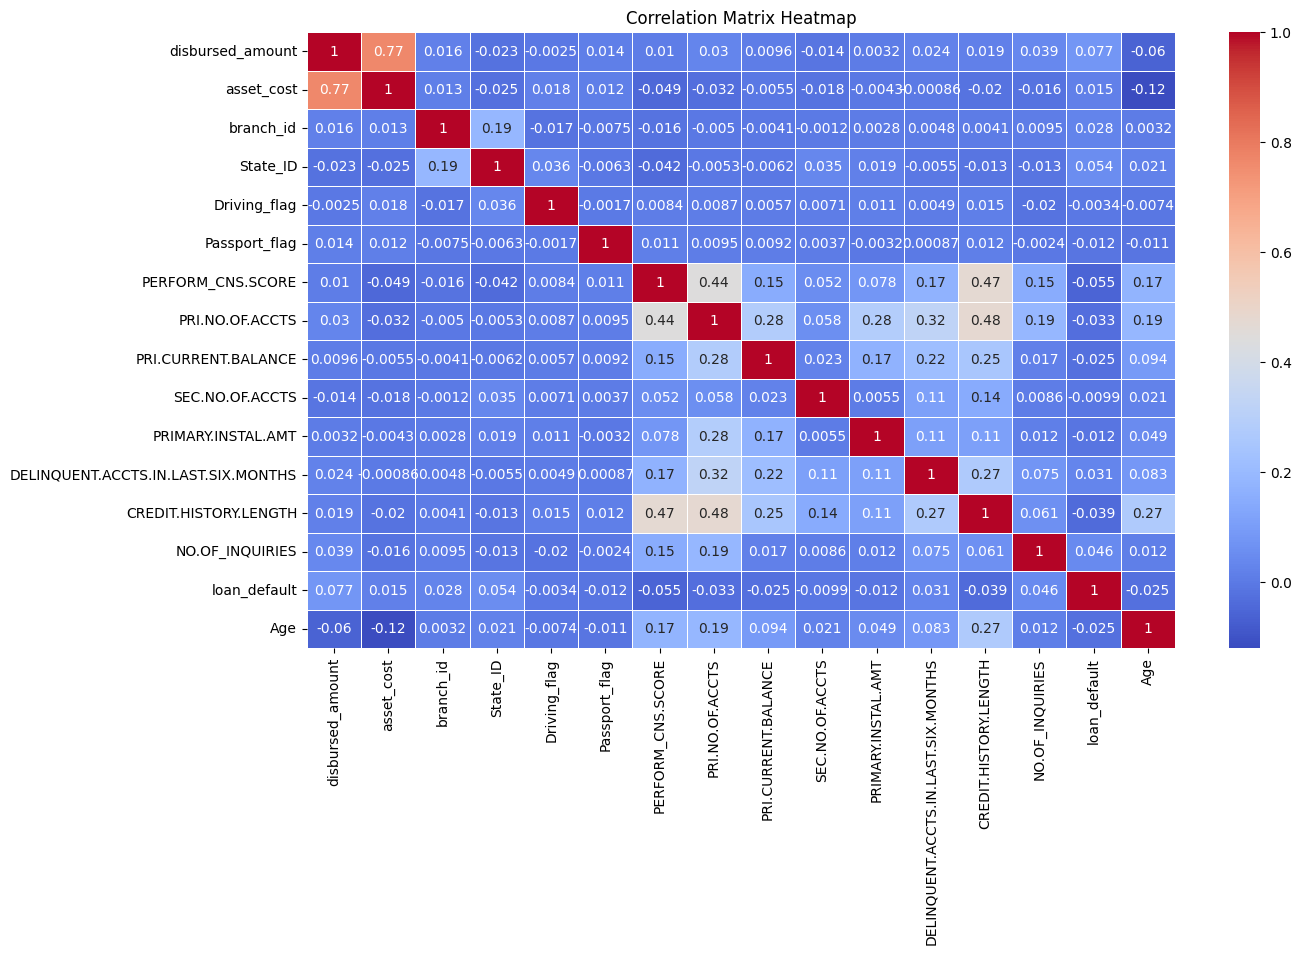

In [20]:
numeric_df = df.select_dtypes(include=['number'])
cleaned_df = numeric_df.dropna(axis=0)

corr_matrix = cleaned_df.corr()

plt.figure(figsize=(14, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

###Preprocessing

####DisbursalDate

In [21]:
df["DisbursalDate"] = pd.to_datetime(df["DisbursalDate"], format="mixed", dayfirst=True)
df["DisbursalMonth"] = df["DisbursalDate"].dt.month
# df["DisbursalDayOfWeek"] = df["DisbursalDate"].dt.dayofweek
df['DisbursalProgress'] = df['DisbursalDate'].dt.day / df["DisbursalDate"].dt.daysinmonth

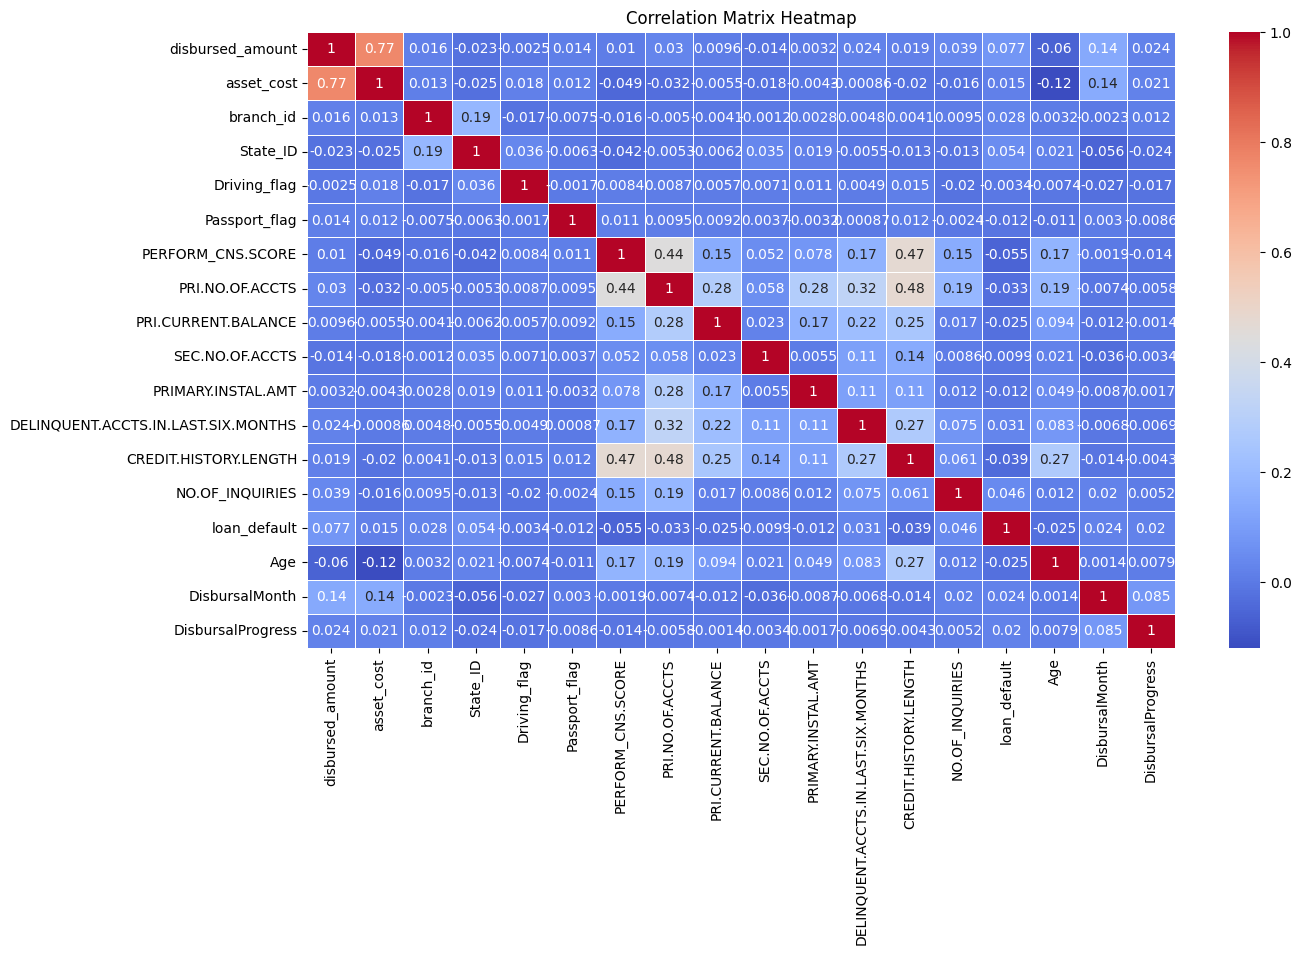

In [22]:
numeric_df = df.select_dtypes(include=['number'])
cleaned_df = numeric_df.dropna(axis=0)

corr_matrix = cleaned_df.corr()

plt.figure(figsize=(14, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

#It appears that DisbursalMonth and DisbursalProgress are somewhat useful, while DisbursalDayOfWeek has little to nothing to do with loan_default

####Missing values


In [23]:
df_missing = ((df.isnull().sum()/len(df))*100)[((df.isnull().sum()/len(df))*100) > 0]
df_missing

,0
Employment.Type,3.276010
Age,3.862179


In [24]:
def if_null_values(feature):
    if feature in df_missing:
        print((f"% of missing values = {df_missing[feature].round(2)}"))
    else:
        print(("No missing values"))

In [25]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [26]:
df['Employment.Type'] = df['Employment.Type'].fillna(df['Employment.Type'].mode()[0])

####Outliers

In [27]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[column] >= (Q1 - 1.5 * IQR)) & (df[column] <= (Q3 + 1.5 * IQR))]

In [28]:
df.columns

Index(['disbursed_amount', 'asset_cost', 'branch_id', 'Employment.Type',
       'DisbursalDate', 'State_ID', 'Driving_flag', 'Passport_flag',
       'PERFORM_CNS.SCORE', 'PRI.NO.OF.ACCTS', 'PRI.CURRENT.BALANCE',
       'SEC.NO.OF.ACCTS', 'PRIMARY.INSTAL.AMT',
       'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'CREDIT.HISTORY.LENGTH',
       'NO.OF_INQUIRIES', 'loan_default', 'Age', 'marital status',
       'DisbursalMonth', 'DisbursalProgress'],
      dtype='object')

######

---



######Employment.Type

In [29]:
if_null_values("Employment.Type")

% of missing values = 3.28


In [30]:
df['Employment.Type'].describe()

,Employment.Type
count,48962
unique,2
top,Self employed
freq,28244


In [31]:
df['Employment.Type'].value_counts()

,count
Employment.Type,
Self employed,28244
Salaried,20718


<Axes: xlabel='Employment.Type', ylabel='count'>

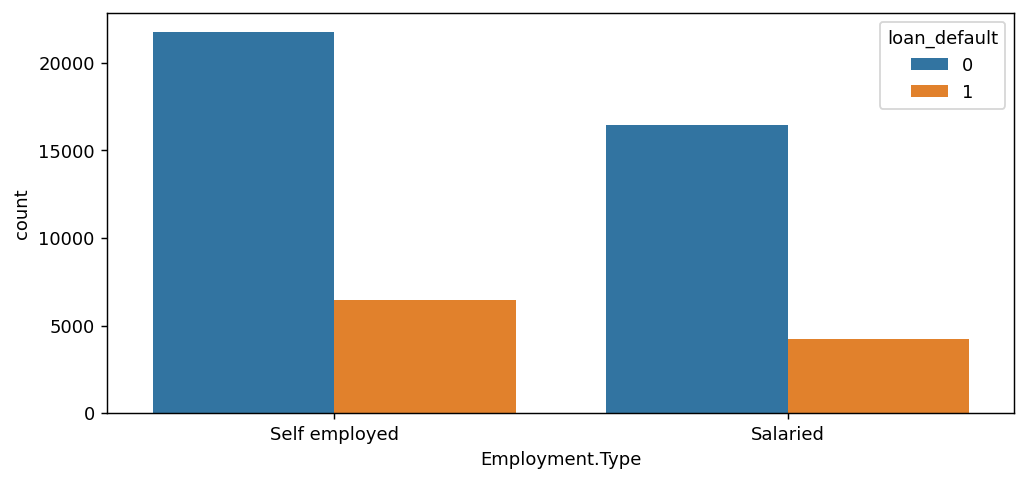

In [32]:
plt.figure(figsize=(9,4), dpi=130)
sns.countplot(data=df, x='Employment.Type', hue='loan_default')

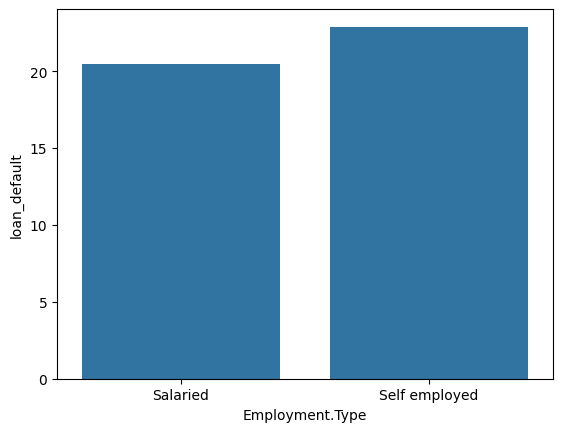

In [33]:
charged_off = df[df['loan_default']==1].groupby("Employment.Type").count()['loan_default']
fully_paid = df[df['loan_default']==0].groupby("Employment.Type").count()['loan_default']
percentage_charged_off = (charged_off * 100)/(charged_off + fully_paid)
sns.barplot(percentage_charged_off);

In [34]:
df.groupby('loan_default')['Employment.Type'].describe()

,count,unique,top,freq
loan_default,,,,
0,38259,2,Self employed,21778
1,10703,2,Self employed,6466


In [35]:
tmp_col = pd.get_dummies(df['Employment.Type'], drop_first=False)
df = pd.concat([df.drop('Employment.Type', axis=1), tmp_col], axis=1)

######marital status

In [36]:
if_null_values("marital status")

No missing values


In [37]:
df['marital status'].describe()

,marital status
count,48962
unique,3
top,Single
freq,21622


In [38]:
df['marital status'].value_counts()

,count
marital status,
Single,21622
Married,15460
Divorced,11880


<Axes: xlabel='marital status', ylabel='count'>

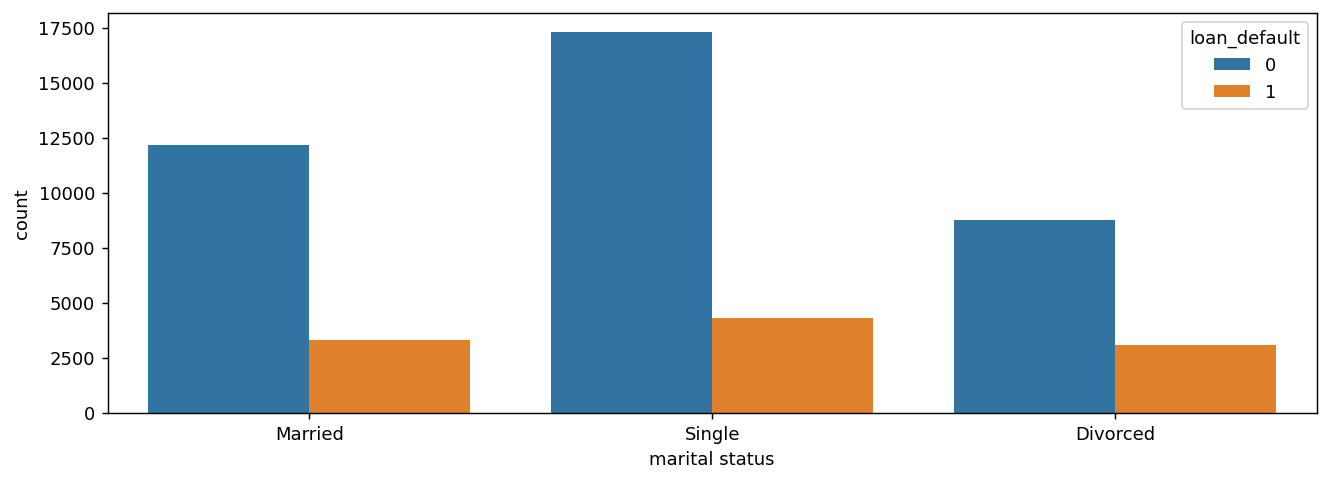

In [39]:
plt.figure(figsize=(12,4), dpi=130)
sns.countplot(data=df, x='marital status', hue='loan_default')

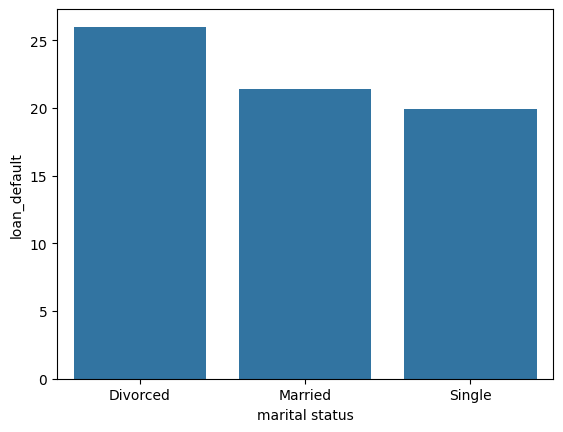

In [40]:
charged_off = df[df['loan_default']==1].groupby("marital status").count()['loan_default']
fully_paid = df[df['loan_default']==0].groupby("marital status").count()['loan_default']
percentage_charged_off = (charged_off * 100)/(charged_off + fully_paid)
sns.barplot(percentage_charged_off);

In [41]:
df.groupby('loan_default')['marital status'].describe()

,count,unique,top,freq
loan_default,,,,
0,38259,3,Single,17314
1,10703,3,Single,4308


In [42]:
tmp_col = pd.get_dummies(df['marital status'], drop_first=False)
df = pd.concat([df.drop('marital status', axis=1), tmp_col], axis=1)

In [43]:
df.sample(10)

,disbursed_amount,asset_cost,branch_id,DisbursalDate,State_ID,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,PRI.CURRENT.BALANCE,...,NO.OF_INQUIRIES,loan_default,Age,DisbursalMonth,DisbursalProgress,Salaried,Self employed,Divorced,Married,Single
8101,53078,75600,2,2018-10-15,4,0,0,624,1,4004,...,0,0,49.0,10,0.483871,True,False,False,False,True
15585,43849,65928,34,2018-09-24,6,0,0,0,0,0,...,0,0,29.0,9,0.800000,True,False,False,True,False
1643,55013,66087,19,2018-09-20,4,0,0,825,13,89084,...,1,0,48.0,9,0.666667,True,False,False,False,True
15356,46349,65320,79,2018-08-23,18,0,0,0,0,0,...,0,0,38.0,8,0.741935,True,False,True,False,False
12988,33311,73981,10,2018-09-07,3,0,0,845,4,54200,...,1,0,53.0,9,0.233333,False,True,False,False,True
45400,45349,55479,3,2018-08-10,1,0,0,0,0,0,...,1,0,29.0,8,0.322581,False,True,False,False,True
9086,52916,64540,5,2018-08-30,9,0,0,0,0,0,...,0,0,48.0,8,0.967742,True,False,False,True,False
47393,63613,80300,258,2018-10-25,16,0,0,0,0,0,...,0,0,50.0,10,0.806452,False,True,True,False,False
2584,58013,80870,1,2018-10-29,3,0,0,0,0,0,...,0,1,26.0,10,0.935484,False,True,False,False,True
45860,66582,85410,2,2018-09-30,4,0,0,0,0,0,...,0,0,34.0,9,1.000000,True,False,False,False,True


######branch_id

In [44]:
if_null_values("branch_id")

No missing values


In [45]:
df['branch_id'].describe()

,branch_id
count,48962.000000
mean,73.136494
std,69.958409
min,1.000000
25%,14.000000
50%,61.000000
75%,130.000000
max,261.000000


<Axes: xlabel='branch_id', ylabel='Count'>

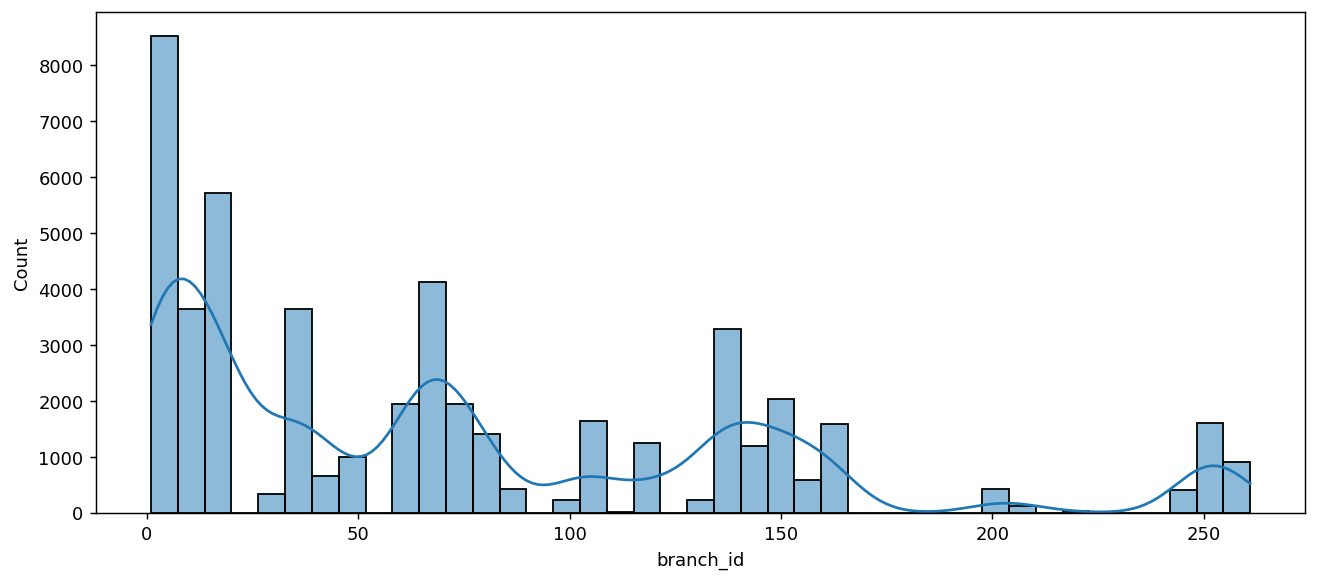

In [46]:
plt.figure(figsize=(12,5), dpi=130)
sns.histplot(x=df['branch_id'], kde=True)

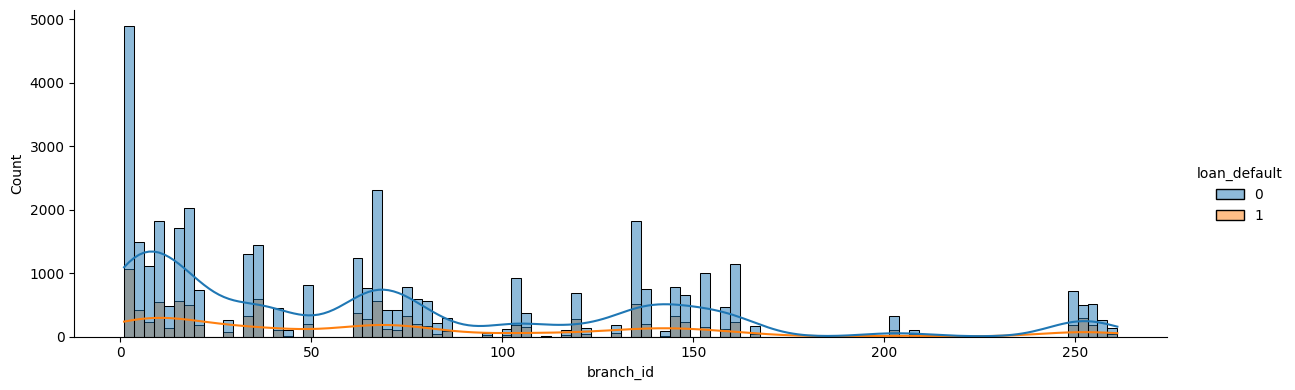

In [47]:
sns.displot(data=df, x='branch_id', hue='loan_default', bins=100, height=4, aspect=3, kde=True);

In [48]:
df.groupby('loan_default')['branch_id'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_default,,,,,,,,
0,38259.0,72.094723,69.372676,1.0,13.0,61.0,130.0,261.0
1,10703.0,76.860413,71.893210,1.0,16.0,64.0,135.0,261.0


######State_ID

In [49]:
if_null_values("State_ID")

No missing values


In [50]:
df['State_ID'].describe()

,State_ID
count,48962.000000
mean,7.250460
std,4.489352
min,1.000000
25%,4.000000
50%,6.000000
75%,10.000000
max,22.000000


<Axes: xlabel='State_ID', ylabel='Count'>

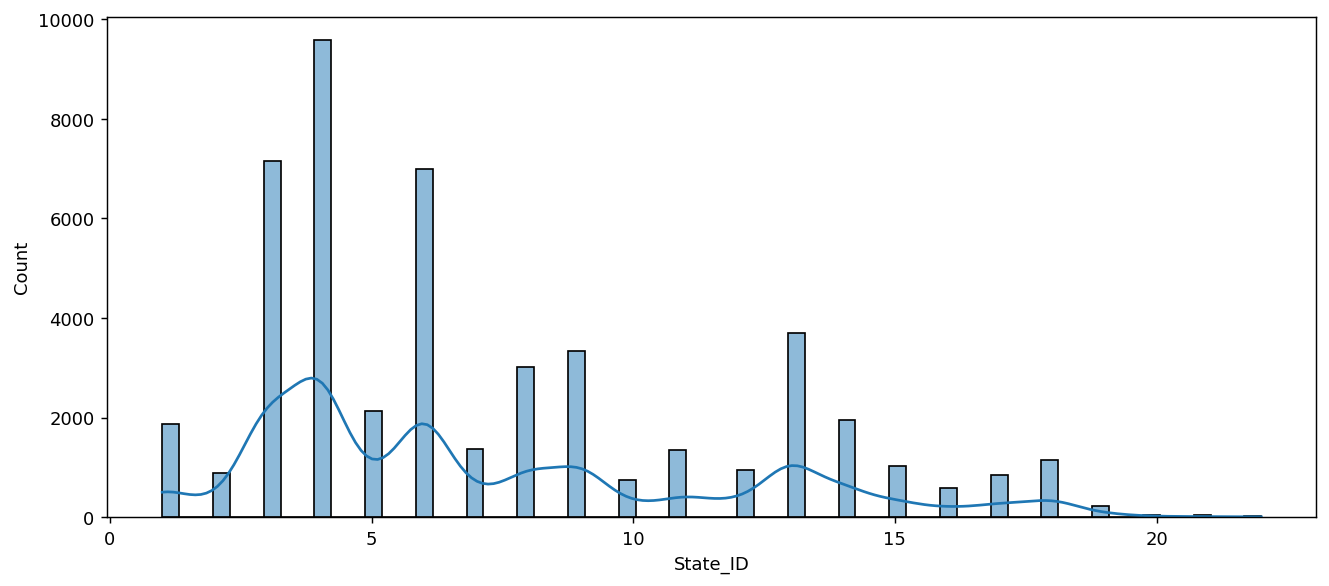

In [51]:
plt.figure(figsize=(12,5), dpi=130)
sns.histplot(x=df['State_ID'], kde=True)

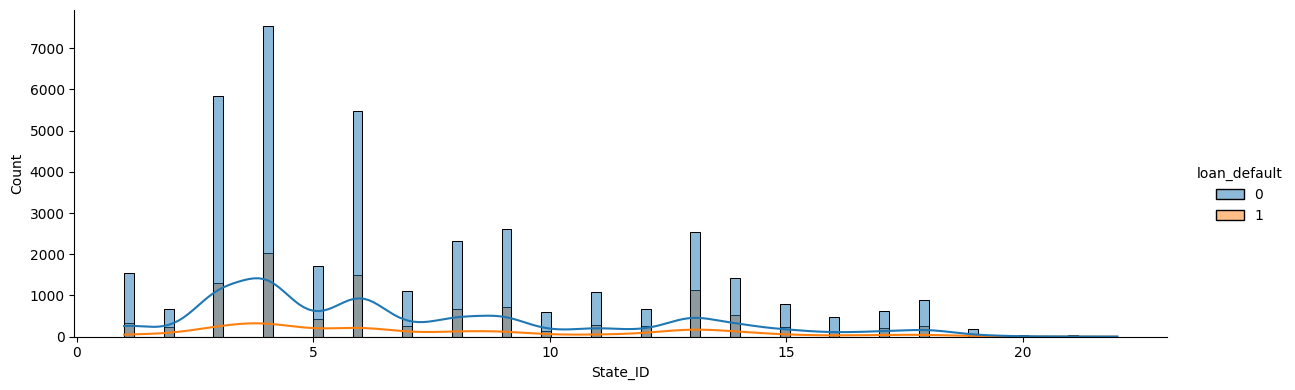

In [52]:
sns.displot(data=df, x='State_ID', hue='loan_default', bins=100, height=4, aspect=3, kde=True);

In [53]:
df.groupby('loan_default')['State_ID'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_default,,,,,,,,
0,38259.0,7.127055,4.459216,1.0,4.0,6.0,9.0,22.0
1,10703.0,7.691582,4.568494,1.0,4.0,6.0,12.0,22.0


######PERFORM_CNS.SCORE

In [54]:
if_null_values("PERFORM_CNS.SCORE")

No missing values


In [55]:
df['PERFORM_CNS.SCORE'].describe()

,PERFORM_CNS.SCORE
count,48962.000000
mean,288.764532
std,338.599975
min,0.000000
25%,0.000000
50%,0.000000
75%,678.000000
max,879.000000


<Axes: xlabel='PERFORM_CNS.SCORE', ylabel='Count'>

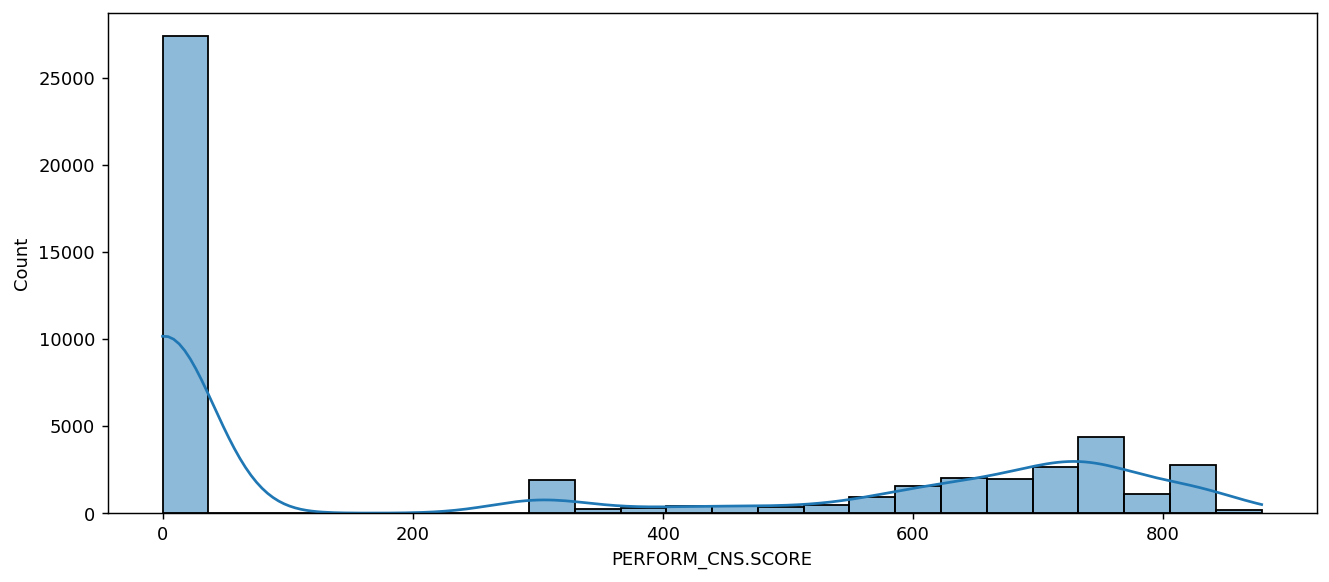

In [56]:
plt.figure(figsize=(12,5), dpi=130)
sns.histplot(x=df['PERFORM_CNS.SCORE'], kde=True)

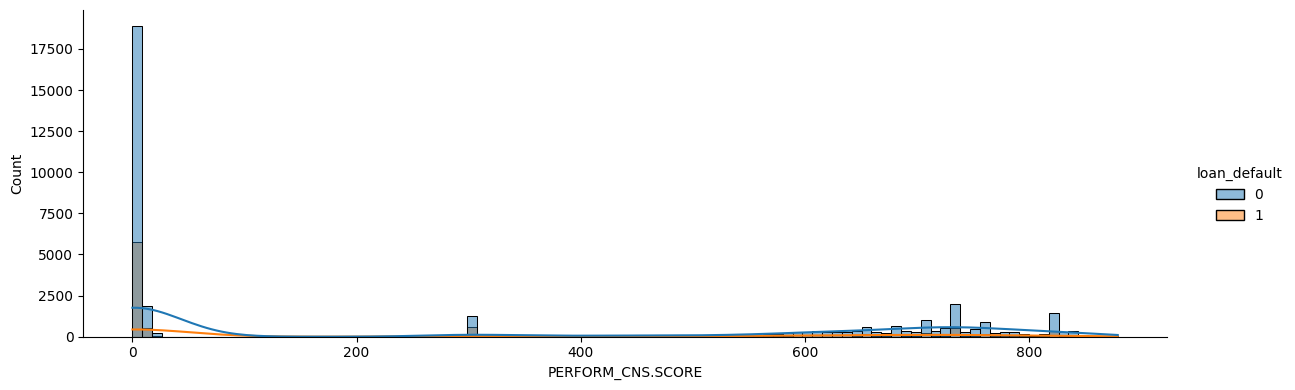

In [57]:
sns.displot(data=df, x='PERFORM_CNS.SCORE', hue='loan_default', bins=100, height=4, aspect=3, kde=True);

In [58]:
df.groupby('loan_default')['PERFORM_CNS.SCORE'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_default,,,,,,,,
0,38259.0,298.913197,343.016785,0.0,0.0,15.0,688.0,879.0
1,10703.0,252.487060,319.709158,0.0,0.0,0.0,615.0,879.0


######Age

In [59]:
if_null_values("Age")

% of missing values = 3.86


In [60]:
df['Age'].describe()

,Age
count,48962.000000
mean,39.809812
std,8.654738
min,24.000000
25%,33.000000
50%,38.000000
75%,46.000000
max,60.000000


<Axes: xlabel='Age', ylabel='Count'>

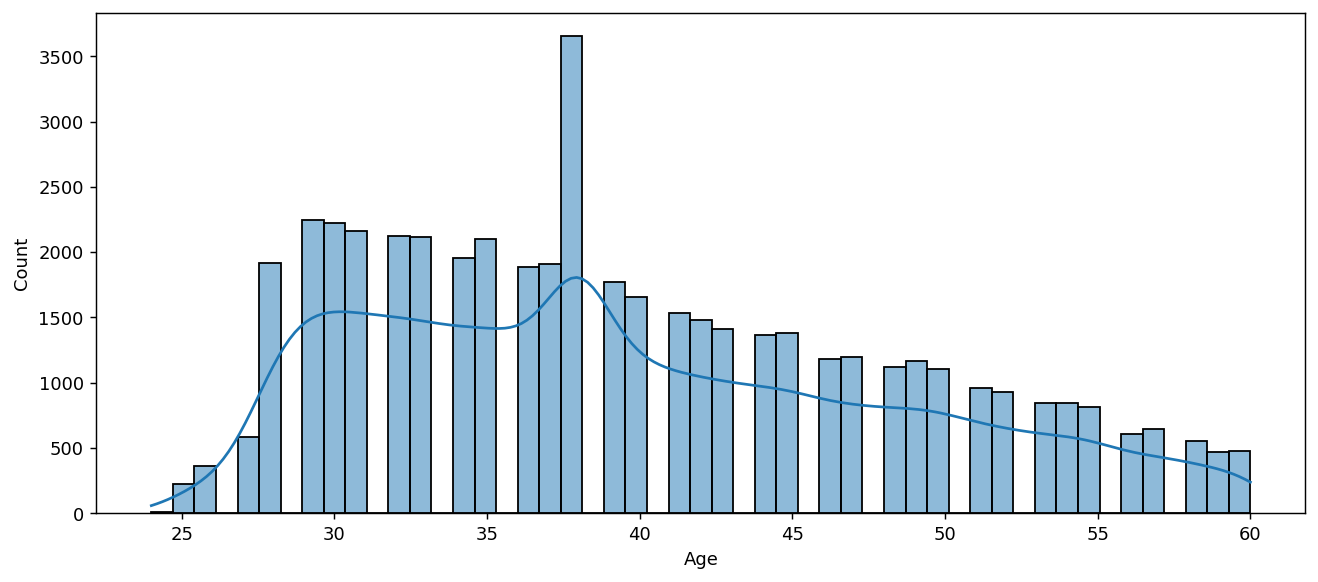

In [61]:
plt.figure(figsize=(12,5), dpi=130)
sns.histplot(x=df['Age'], kde=True)

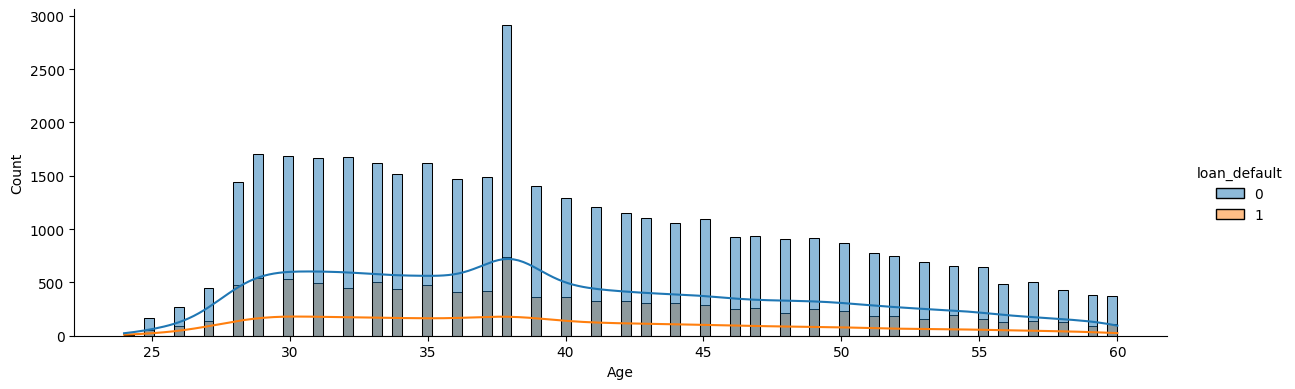

In [62]:
sns.displot(data=df, x='Age', hue='loan_default', bins=100, height=4, aspect=3, kde=True);

In [63]:
df.groupby('loan_default')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_default,,,,,,,,
0,38259.0,39.919365,8.650751,24.0,33.0,38.0,46.0,60.0
1,10703.0,39.418201,8.658053,24.0,32.0,38.0,45.0,60.0


######disbursed_amount

In [64]:
if_null_values("disbursed_amount")

No missing values


In [65]:
df['disbursed_amount'].describe()

,disbursed_amount
count,48962.000000
mean,54336.719640
std,13364.092014
min,13320.000000
25%,47049.000000
50%,53803.000000
75%,60370.750000
max,990572.000000


<Axes: xlabel='disbursed_amount', ylabel='Count'>

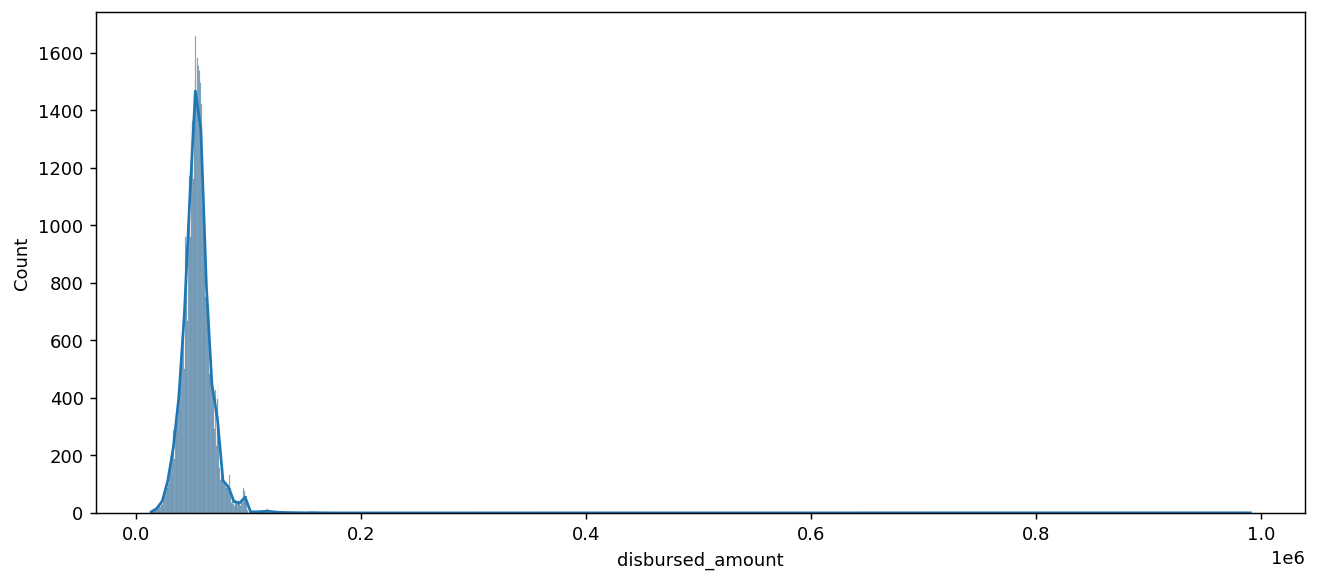

In [66]:
plt.figure(figsize=(12,5), dpi=130)
sns.histplot(x=df['disbursed_amount'], kde=True)

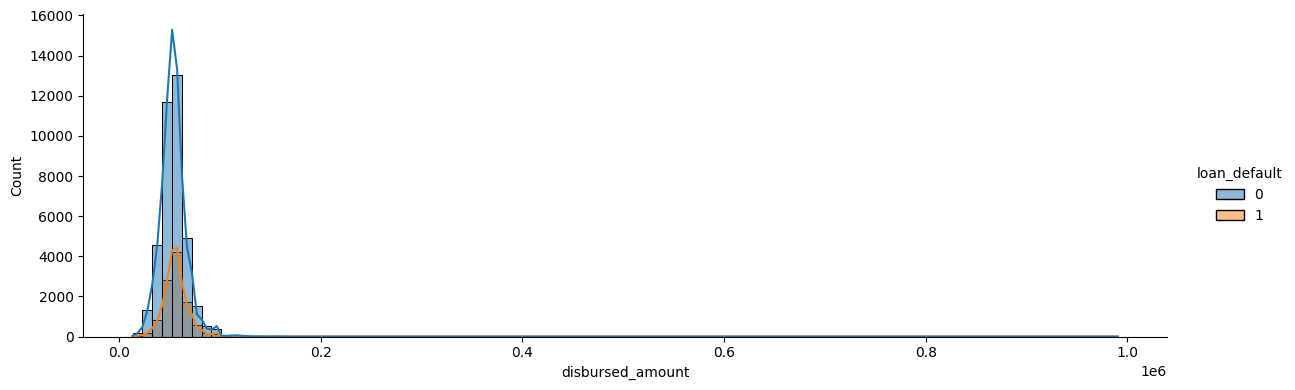

In [67]:
sns.displot(data=df, x='disbursed_amount', hue='loan_default', bins=100, height=4, aspect=3, kde=True);

In [68]:
df.groupby('loan_default')['disbursed_amount'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_default,,,,,,,,
0,38259.0,53786.695366,13608.128792,13320.0,46349.0,53303.0,59947.0,990572.0
1,10703.0,56302.839297,12253.070706,13369.0,49303.0,55459.0,61947.0,179176.0


In [69]:
# df = remove_outliers(df, "disbursed_amount")

######asset_cost

In [70]:
if_null_values("asset_cost")

No missing values


In [71]:
df['asset_cost'].describe()

,asset_cost
count,4.896200e+04
mean,7.589285e+04
std,1.970148e+04
min,3.809800e+04
25%,6.572100e+04
50%,7.096100e+04
75%,7.915300e+04
max,1.628992e+06


<Axes: xlabel='asset_cost', ylabel='Count'>

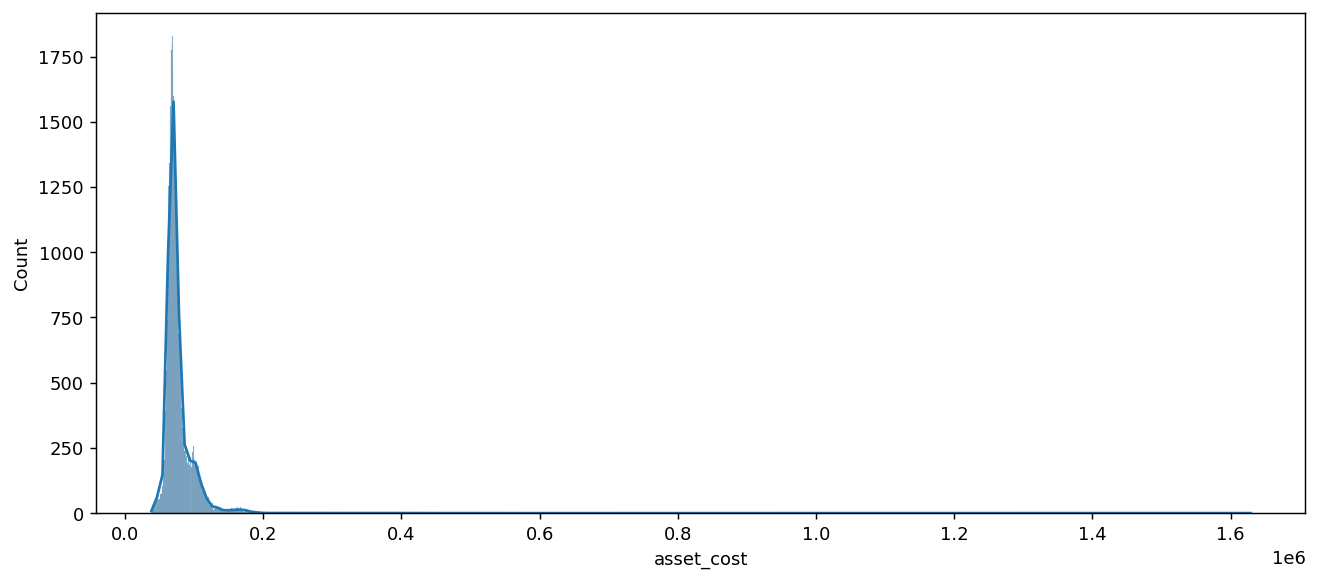

In [72]:
plt.figure(figsize=(12,5), dpi=130)
sns.histplot(x=df['asset_cost'], kde=True)

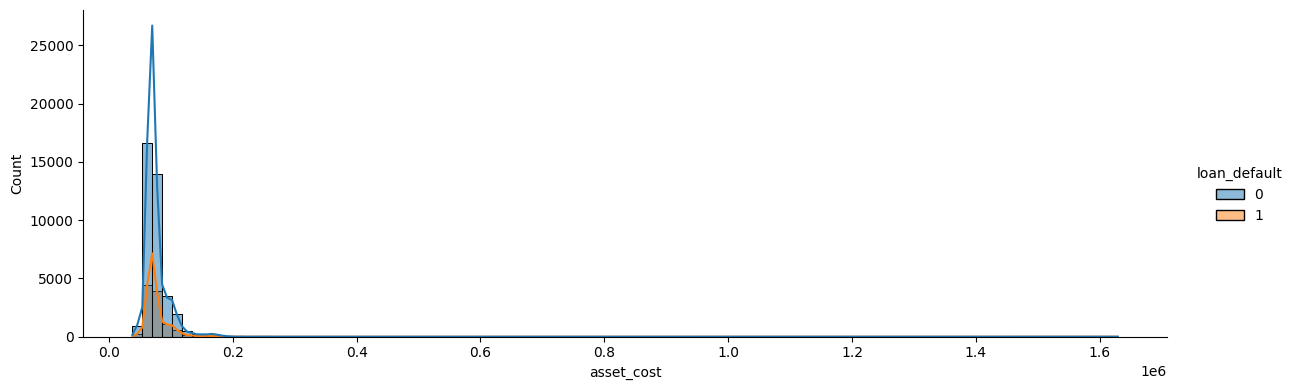

In [73]:
sns.displot(data=df, x='asset_cost', hue='loan_default', bins=100, height=4, aspect=3, kde=True);

In [74]:
df.groupby('loan_default')['asset_cost'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_default,,,,,,,,
0,38259.0,75723.491544,19929.189849,38098.0,65662.0,70857.0,78963.0,1628992.0
1,10703.0,76498.250117,18853.507492,38881.0,65936.5,71344.0,80000.0,281164.0


In [75]:
# df = remove_outliers(df, "asset_cost")

######CREDIT.HISTORY.LENGTH

In [76]:
if_null_values("CREDIT.HISTORY.LENGTH")

No missing values


In [77]:
df['CREDIT.HISTORY.LENGTH'].describe()

,CREDIT.HISTORY.LENGTH
count,48962.000000
mean,16.129958
std,28.458730
min,0.000000
25%,0.000000
50%,0.000000
75%,23.000000
max,345.000000


<Axes: xlabel='CREDIT.HISTORY.LENGTH', ylabel='Count'>

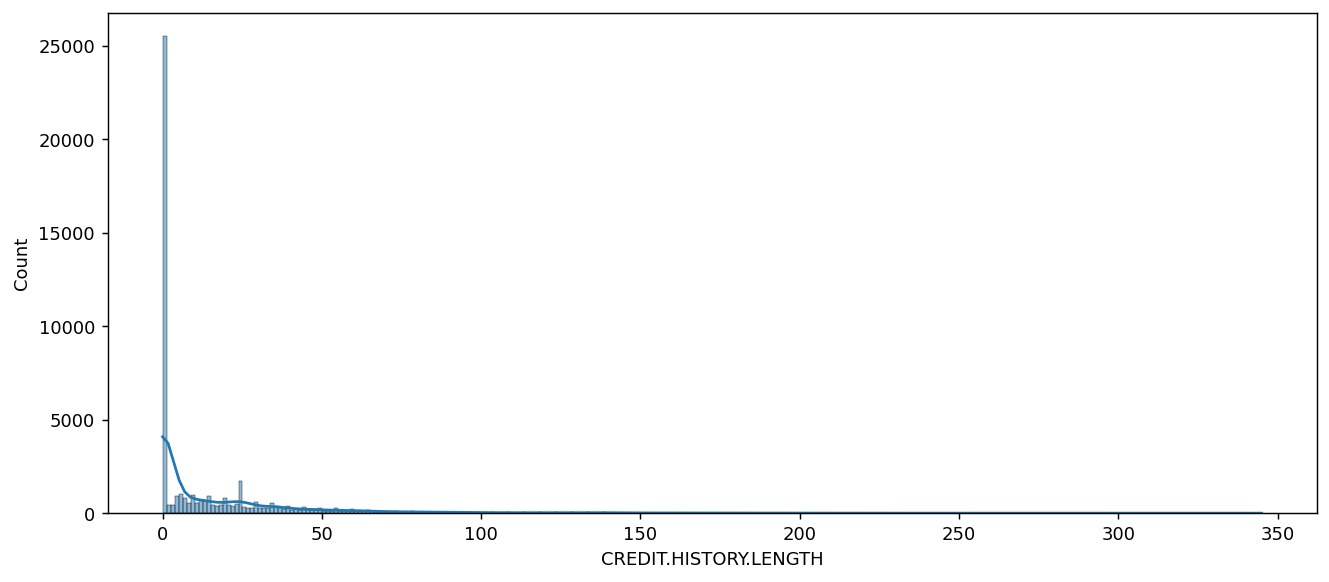

In [78]:
plt.figure(figsize=(12,5), dpi=130)
sns.histplot(x=df['CREDIT.HISTORY.LENGTH'], kde=True)

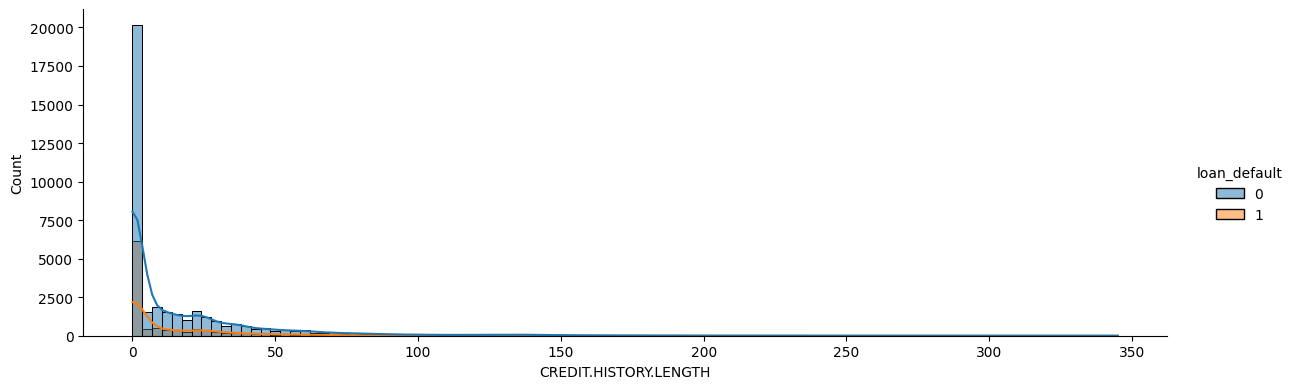

In [79]:
sns.displot(data=df, x='CREDIT.HISTORY.LENGTH', hue='loan_default', bins=100, height=4, aspect=3, kde=True);

In [80]:
df.groupby('loan_default')['CREDIT.HISTORY.LENGTH'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_default,,,,,,,,
0,38259.0,16.752607,29.176962,0.0,0.0,0.0,24.0,345.0
1,10703.0,13.904232,25.605683,0.0,0.0,0.0,21.0,290.0


In [81]:
# df = remove_outliers(df, "CREDIT.HISTORY.LENGTH")

######PRI.NO.OF.ACCTS

In [82]:
if_null_values("PRI.NO.OF.ACCTS")

No missing values


In [83]:
df['PRI.NO.OF.ACCTS'].describe()

,PRI.NO.OF.ACCTS
count,48962.000000
mean,2.419101
std,5.007325
min,0.000000
25%,0.000000
50%,0.000000
75%,3.000000
max,104.000000


<Axes: xlabel='PRI.NO.OF.ACCTS', ylabel='Count'>

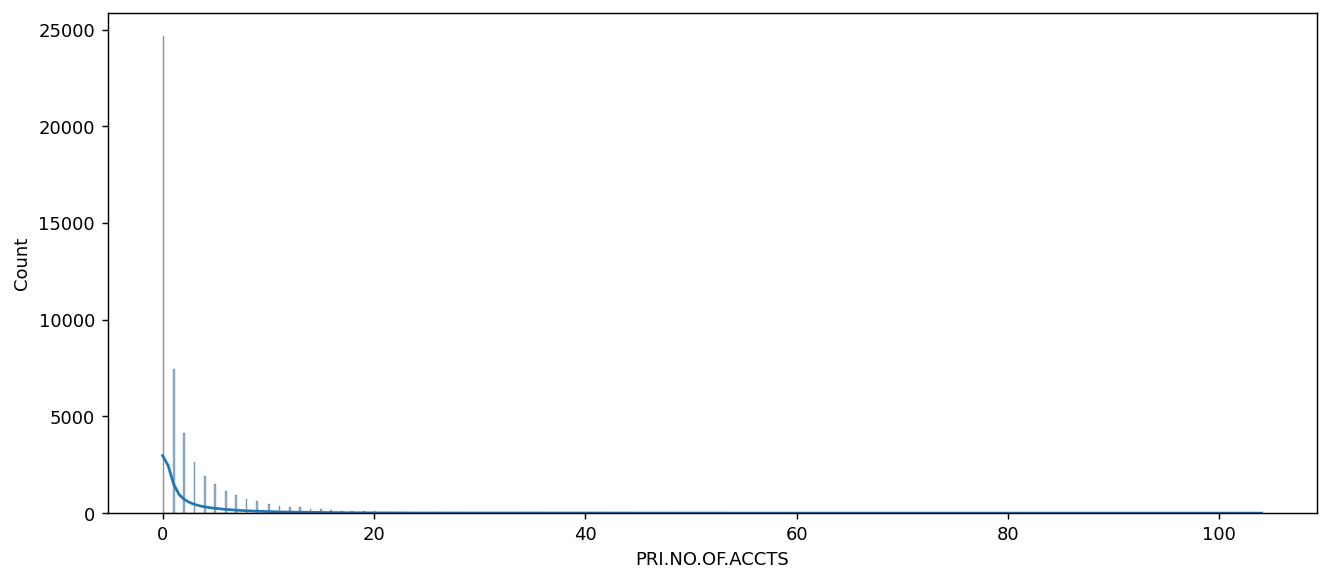

In [84]:
plt.figure(figsize=(12,5), dpi=130)
sns.histplot(x=df['PRI.NO.OF.ACCTS'], kde=True)

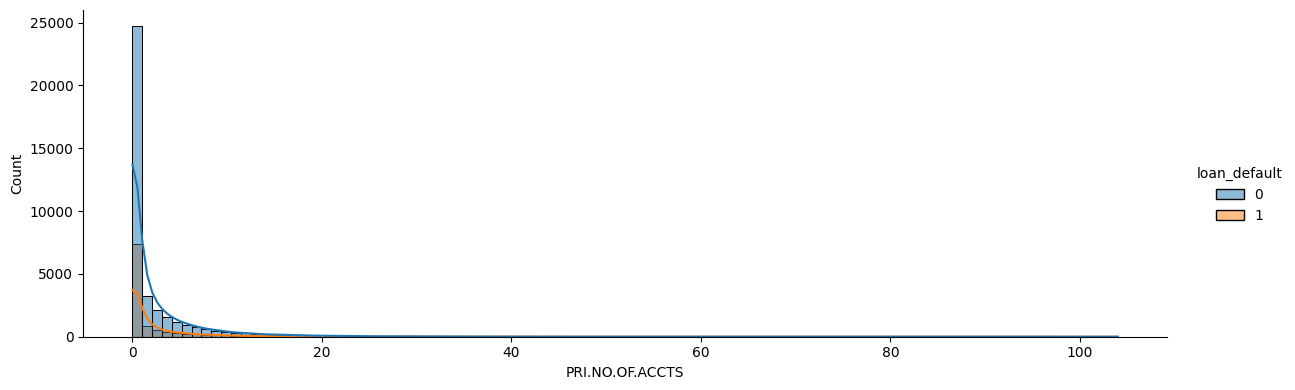

In [85]:
sns.displot(data=df, x='PRI.NO.OF.ACCTS', hue='loan_default', bins=100, height=4, aspect=3, kde=True);

In [86]:
df.groupby('loan_default')['PRI.NO.OF.ACCTS'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_default,,,,,,,,
0,38259.0,2.507907,5.131509,0.0,0.0,1.0,3.0,93.0
1,10703.0,2.101654,4.521687,0.0,0.0,0.0,2.0,104.0


In [87]:
# df = remove_outliers(df, "PRI.NO.OF.ACCTS")

######PRIMARY.INSTAL.AMT -a

In [88]:
if_null_values("PRIMARY.INSTAL.AMT")

No missing values


In [89]:
df['PRIMARY.INSTAL.AMT'].describe()

,PRIMARY.INSTAL.AMT
count,4.896200e+04
mean,1.377215e+04
std,1.432032e+05
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,1.943000e+03
max,1.551855e+07


In [90]:
# plt.figure(figsize=(12,5), dpi=130)
# sns.histplot(x=df['PRIMARY.INSTAL.AMT'], kde=True)

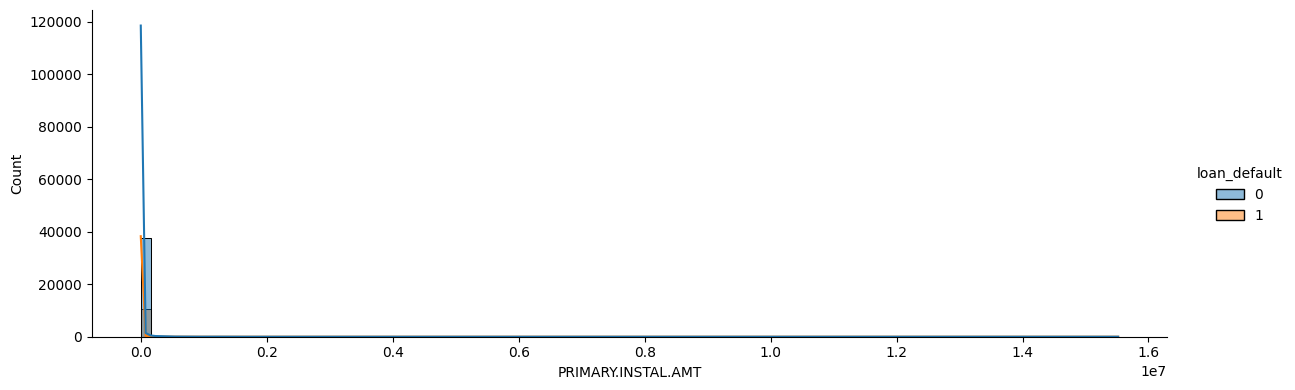

In [91]:
sns.displot(data=df, x='PRIMARY.INSTAL.AMT', hue='loan_default', bins=100, height=4, aspect=3, kde=True);

In [92]:
df.groupby('loan_default')['PRIMARY.INSTAL.AMT'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_default,,,,,,,,
0,38259.0,14710.921509,152542.006599,0.0,0.0,0.0,1980.0,15518546.0
1,10703.0,10416.412781,103059.280188,0.0,0.0,0.0,1874.5,4189968.0


In [93]:
# df = remove_outliers(df, "PRIMARY.INSTAL.AMT")

######PRI.CURRENT.BALANCE -a

In [94]:
if_null_values("PRI.CURRENT.BALANCE")

No missing values


In [95]:
df['PRI.CURRENT.BALANCE'].describe()

,PRI.CURRENT.BALANCE
count,4.896200e+04
mean,1.663824e+05
std,9.428797e+05
min,-1.408314e+06
25%,0.000000e+00
50%,0.000000e+00
75%,3.439575e+04
max,5.638582e+07


In [96]:
# plt.figure(figsize=(12,5), dpi=130)
# sns.histplot(x=df['PRI.CURRENT.BALANCE'], kde=True)

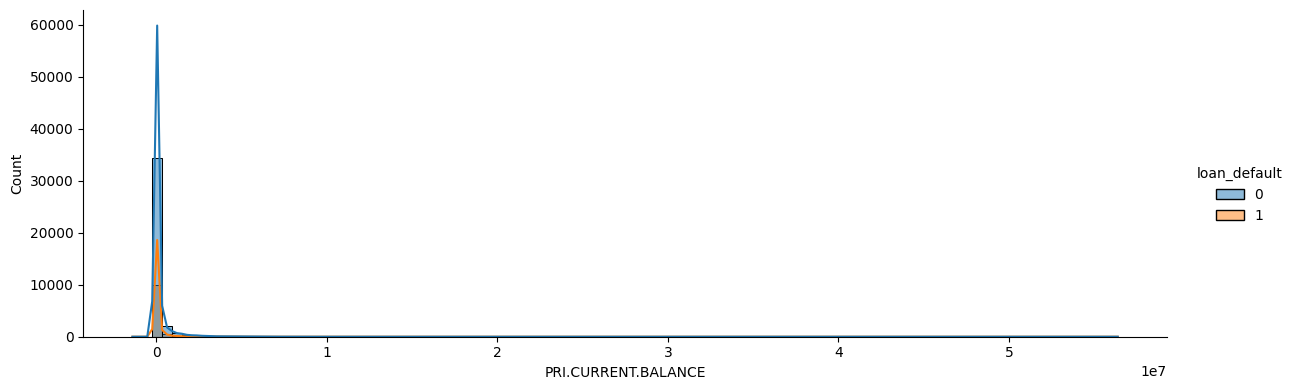

In [97]:
sns.displot(data=df, x='PRI.CURRENT.BALANCE', hue='loan_default', bins=100, height=4, aspect=3, kde=True);

In [98]:
df.groupby('loan_default')['PRI.CURRENT.BALANCE'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_default,,,,,,,,
0,38259.0,178794.879270,997365.489293,-1408314.0,0.0,0.0,36622.0,56385824.0
1,10703.0,122012.817434,713209.740264,-63021.0,0.0,0.0,27094.0,34718432.0


In [99]:
# df = remove_outliers(df, "PRI.CURRENT.BALANCE")

### SMOTE

In [100]:
columns_to_drop = ['NO.OF_INQUIRIES', 'DisbursalDate', 'Driving_flag', 'Passport_flag', 'SEC.NO.OF.ACCTS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS']
df = df.drop(columns=columns_to_drop, axis=1)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48962 entries, 0 to 48961
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   disbursed_amount       48962 non-null  int64  
 1   asset_cost             48962 non-null  int64  
 2   branch_id              48962 non-null  int64  
 3   State_ID               48962 non-null  int64  
 4   PERFORM_CNS.SCORE      48962 non-null  int64  
 5   PRI.NO.OF.ACCTS        48962 non-null  int64  
 6   PRI.CURRENT.BALANCE    48962 non-null  int64  
 7   PRIMARY.INSTAL.AMT     48962 non-null  int64  
 8   CREDIT.HISTORY.LENGTH  48962 non-null  int64  
 9   loan_default           48962 non-null  int64  
 10  Age                    48962 non-null  float64
 11  DisbursalMonth         48962 non-null  int32  
 12  DisbursalProgress      48962 non-null  float64
 13  Salaried               48962 non-null  bool   
 14  Self employed          48962 non-null  bool   
 15  Di

In [102]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, auc

from imblearn.combine import SMOTETomek, SMOTEENN
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

In [103]:
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    cm = confusion_matrix(y_true, y_pred)
    report = classification_report(y_true, y_pred)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Confusion Matrix:\n", cm)
    print("Classification Report:\n", report)

In [104]:
X = df.drop('loan_default', axis=1)
y = df['loan_default']

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [106]:
smt = SMOTEENN(random_state=42)
X_resampled, y_resampled = smt.fit_resample(X_train, y_train)

###Unknown-Data preparation

In [107]:
def processor(df):
  df["DisbursalDate"] = pd.to_datetime(df["DisbursalDate"], format="mixed", dayfirst=True)
  df["DisbursalMonth"] = df["DisbursalDate"].dt.month
  # df["DisbursalDayOfWeek"] = df["DisbursalDate"].dt.dayofweek
  df['DisbursalProgress'] = df['DisbursalDate'].dt.day / df["DisbursalDate"].dt.daysinmonth

  columns_to_drop = ['NO.OF_INQUIRIES', 'DisbursalDate', 'Driving_flag', 'Passport_flag', 'SEC.NO.OF.ACCTS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS']
  df = df.drop(columns=columns_to_drop, axis=1)

  df['CREDIT.HISTORY.LENGTH'] = df['CREDIT.HISTORY.LENGTH'].apply(credit_history_to_months)

  df['Age'] = df['Age'].replace({"?" : None})
  df['Age'] = pd.to_numeric(df['Age'])

  df['Age'] = df['Age'].fillna(df['Age'].median())
  df['Employment.Type'] = df['Employment.Type'].fillna(df['Employment.Type'].mode()[0])

  tmp_col = pd.get_dummies(df['Employment.Type'], drop_first=False)
  df = pd.concat([df.drop('Employment.Type', axis=1), tmp_col], axis=1)

  tmp_col = pd.get_dummies(df['marital status'], drop_first=False)
  df = pd.concat([df.drop('marital status', axis=1), tmp_col], axis=1)
  return df

In [108]:
df_unknown = processor(df_unknown)

In [109]:
from google.colab import files
def getPreds(model, df, name):
  preds = model.predict(df)
  output_df = pd.DataFrame(preds, columns=['prediction-Loan-Default'])
  output_df.insert(0, 'row ID', ['Row{}'.format(i) for i in range(len(output_df))])
  output_df.to_csv(name+'.csv', index=False)
  files.download(name + '.csv')


###Random Forest

In [110]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf_param = {
    'n_estimators': [100, 300, 500],
    'min_samples_split': [2, 5, 7, 10],
    'min_samples_leaf': [1, 2, 4, 6],
    'criterion': ['gini', 'entropy'],
    'class_weight': [{0: 1, 1: 3}, {0: 1, 1: 5}, {0: 1, 1: 7}]
}

rf = RandomForestClassifier(
    random_state=42
)

rf_grid = GridSearchCV(
    rf,
    rf_param,
    scoring='f1',
    cv=5,
    n_jobs=-1
)

# rf_grid.fit(X_resampled, y_resampled)

# print("Best params:", rf_grid.best_params_)
# print("Best precision:", rf_grid.best_score_)


In [111]:
rf = RandomForestClassifier(
    n_estimators=500,
    min_samples_split=10,
    min_samples_leaf=4,
    criterion = 'entropy',
    class_weight={0: 1, 1: 5},
    random_state=42
)

rf.fit(X_resampled, y_resampled)

RandomForestClassifier(class_weight={0: 1, 1: 5}, criterion='entropy',
                       min_samples_leaf=4, min_samples_split=10,
                       n_estimators=500, random_state=42)

In [112]:
preds = rf.predict(X_test)
evaluate_model(y_test, preds)

Accuracy: 0.548555090370673
Precision: 0.7233968112172405
Recall: 0.548555090370673
F1 Score: 0.5875808341345788
Confusion Matrix:
 [[3978 3703]
 [ 718 1394]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.52      0.64      7681
           1       0.27      0.66      0.39      2112

    accuracy                           0.55      9793
   macro avg       0.56      0.59      0.51      9793
weighted avg       0.72      0.55      0.59      9793



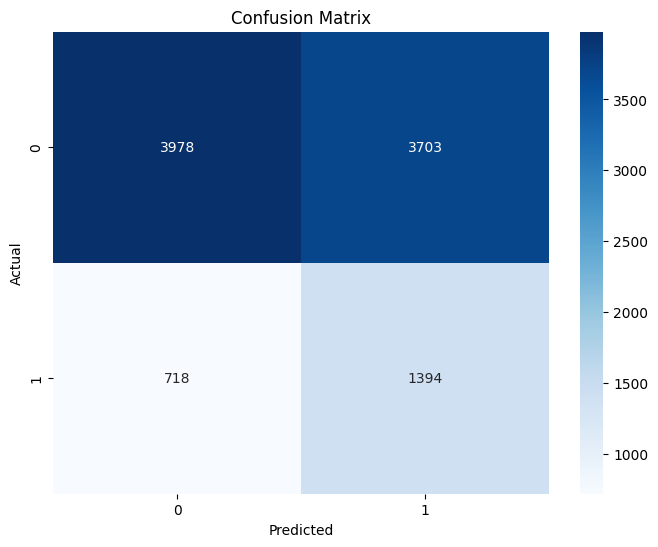

In [113]:
cm = confusion_matrix(y_test, preds)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [114]:
# getPreds(rf, df_unknown, "RandomForest")

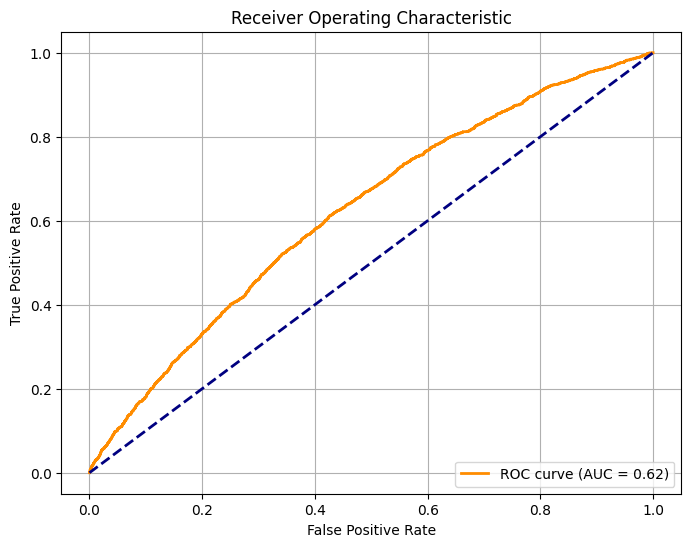

In [115]:
y_proba = rf.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

###Decision Tree

In [116]:
dt_param = {
    'min_samples_split': [2, 5, 7, 10],
    'min_samples_leaf': [1, 2, 4, 6],
    'criterion': ['gini', 'entropy'],
    'class_weight': [{0: 1, 1: 3}, {0: 1, 1: 5}, {0: 1, 1: 7}]
}

dt = DecisionTreeClassifier(
    random_state=42
)

dt_grid = GridSearchCV(
    dt,
    dt_param,
    scoring='f1',
    cv=5,
    n_jobs=-1
)

# dt_grid.fit(X_resampled, y_resampled)

# print("Best params:", dt_grid.best_params_)
# print("Best score:", dt_grid.best_score_)

In [117]:
dt = DecisionTreeClassifier(
    criterion='entropy',
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight={0: 1, 1: 5},
    random_state=42
)

dt.fit(X_resampled, y_resampled)

DecisionTreeClassifier(class_weight={0: 1, 1: 5}, criterion='entropy',
                       min_samples_leaf=2, min_samples_split=5,
                       random_state=42)

In [118]:
preds = dt.predict(X_test)
evaluate_model(y_test,preds)

Accuracy: 0.6021648116001226
Precision: 0.6834670285365212
Recall: 0.6021648116001226
F1 Score: 0.632120562938101
Confusion Matrix:
 [[5015 2666]
 [1230  882]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.65      0.72      7681
           1       0.25      0.42      0.31      2112

    accuracy                           0.60      9793
   macro avg       0.53      0.54      0.52      9793
weighted avg       0.68      0.60      0.63      9793



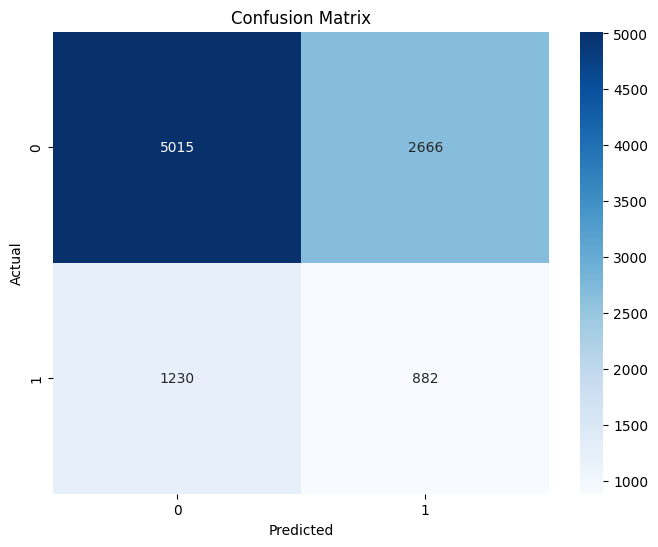

In [119]:
cm = confusion_matrix(y_test, preds)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=dt.classes_, yticklabels=dt.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [120]:
# getPreds(dt, df_unknown, "DecisionTree")

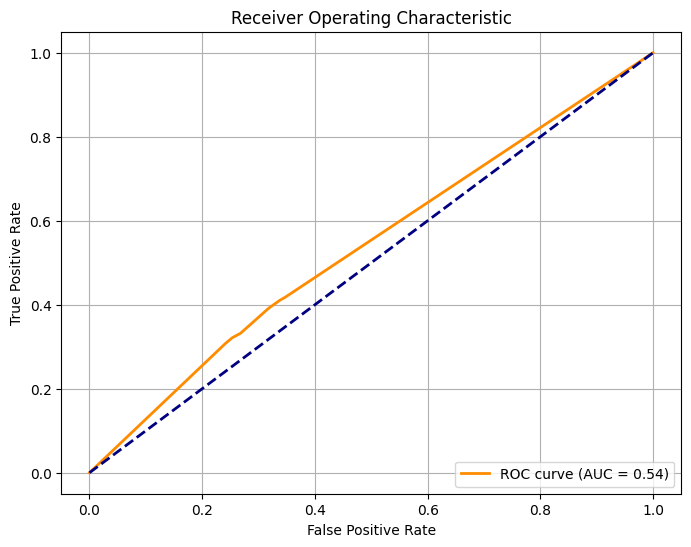

In [121]:
y_proba = dt.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

###K-Nearest Neighbour

In [122]:
knn_param = {
    'min_samples_split': [2, 5, 7, 10],
    'min_samples_leaf': [1, 2, 4, 6],
    'criterion': ['gini', 'entropy'],
    'class_weight': [{0: 1, 1: 3}, {0: 1, 1: 5}, {0: 1, 1: 7}]
}

knn = KNeighborsClassifier(
    random_state=42
)

knn_grid = GridSearchCV(
    knn,
    knn_param,
    scoring='f1',
    cv=5,
    n_jobs=-1
)

# knn_grid.fit(X_resampled, y_resampled)

# print("Best params:", knn_grid.best_params_)
# print("Best score:", knn_grid.best_score_)

TypeError: KNeighborsClassifier.__init__() got an unexpected keyword argument 'random_state'

In [ ]:
knn = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=5))
])
# knn.fit(X_resampled, y_resampled)

In [ ]:
preds = knn.predict(X_test)
evaluate_model(y_test,preds)

In [ ]:
cm = confusion_matrix(y_test, preds)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
y_proba = knn.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
# getPreds(knn, df_unknown, "KNN")

###Support Vector Machine

In [ ]:
from sklearn.svm import SVC
svm = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf', class_weight='balanced', probability=True, random_state=42))
])


svm.fit(X_resampled, y_resampled)


In [ ]:

# param_grid = {
#     'svm__C': [0.1, 1, 10],
#     'svm__gamma': ['scale', 'auto'],
#     'svm__kernel': ['rbf', 'poly'],
# }

# grid = GridSearchCV(svm, param_grid, scoring='f1', cv=5, n_jobs=-1)

# grid.fit(X_resampled, y_resampled)

In [ ]:
preds = svm.predict(X_test)
evaluate_model(y_test,preds)

In [ ]:
cm = confusion_matrix(y_test, preds)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
y_proba = svm.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
# getPreds(svm, df_unknown, "SVM")

###Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier
nn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(hidden_layer_sizes=(100, 50),
                          activation='relu',
                          solver='adam',
                          alpha=0.001,
                          max_iter=300,
                          random_state=42))
])

In [ ]:
nn_pipeline.fit(X_resampled, y_resampled)

In [ ]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'mlp__hidden_layer_sizes': [(100,), (100, 50), (150, 100)],
#     'mlp__activation': ['relu', 'tanh'],
#     'mlp__alpha': [0.0001, 0.001, 0.01],
#     'mlp__solver': ['adam', 'lbfgs'],
# }

# grid = GridSearchCV(nn_pipeline, param_grid, scoring='f1', cv=5, n_jobs=-1)
# grid.fit(X_resampled, y_resampled)

In [ ]:
preds = nn_pipeline.predict(X_test)
evaluate_model(y_test,preds)

In [ ]:
cm = confusion_matrix(y_test, preds)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
getPreds(nn_pipeline, df_unknown, "NeuralNetwork")

In [ ]:
y_proba = nn_pipeline.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()